# Import libraries

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Nomenclature
- DSR- Direct age Standardised Rate for hospital admissions
- lcl- Lower Confidence limit
- ucl- Upper Confidence limit
- score- Index of Multiple Deprivation Score
- rank- Index of Multiple Deprivation Rank
- decile- Index of Multiple Deprivation Decile

# Read in HES DSR's 
- Append HES data to have one file with all the years data for each disease group
- Save as csv

In [2]:
Circulatory2009 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2009.csv')

In [3]:
Circulatory2010 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2010.csv')

In [4]:
Circulatory2011 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2011.csv')

In [5]:
Circulatory2012 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2012.csv')

In [6]:
Circulatory2013 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2013.csv')

In [7]:
Circulatory2014 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_2014.csv')

In [8]:
Circulatory_monthly = Circulatory2009.append([Circulatory2010, Circulatory2011, Circulatory2012, Circulatory2013, Circulatory2014])

In [9]:
Circulatory_monthly[:5]

,Disease,year,month,lsoa11,n,DSR,lcl,ucl,score,rank,decile
0,All Circulatory,2009,1,E01015272,NaN,69.247604,8.247776,250.557617,11.430000,22492,7
1,All Circulatory,2009,1,E01015273,NaN,147.841522,3.743035,823.720154,33.619999,6665,3
2,All Circulatory,2009,1,E01015274,NaN,187.446503,38.159660,549.000244,20.290001,13991,5
3,All Circulatory,2009,1,E01015275,NaN,309.000488,59.781487,912.577210,19.780001,14447,5
4,All Circulatory,2009,1,E01015276,NaN,162.742996,15.881656,599.259460,26.400000,10063,4


In [10]:
Circulatory_monthly.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_all.csv')

In [11]:
Respiratory_2009 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2009.csv')

In [12]:
Respiratory_2010 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2010.csv')

In [13]:
Respiratory_2011 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2011.csv')

In [14]:
Respiratory_2012 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2012.csv')

In [15]:
Respiratory_2013 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2013.csv')

In [16]:
Respiratory_2014 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_2014.csv')

In [17]:
Respiratory_monthly = Respiratory_2009.append([Respiratory_2010, Respiratory_2011, Respiratory_2012, Respiratory_2013, Respiratory_2014])

In [18]:
Respiratory_monthly[:5]

,Disease,year,month,lsoa11,n,DSR,lcl,ucl,score,rank,decile
0,All Respiratory,2009,1,E01015274,NaN,78.530869,1.988227,437.546020,20.290001,13991,5
1,All Respiratory,2009,1,E01015275,NaN,198.915909,20.564419,729.030701,19.780001,14447,5
2,All Respiratory,2009,1,E01015276,8.0,519.371643,196.146973,1071.320923,26.400000,10063,4
3,All Respiratory,2009,1,E01015277,6.0,607.023254,197.484589,1368.225708,35.400002,5995,2
4,All Respiratory,2009,1,E01015279,5.0,469.725189,136.399750,1128.015015,45.439999,3096,1


In [19]:
Respiratory_monthly.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_all.csv')

# Regression between HES and deprivation

In [22]:
model = ols("DSR ~ score", data=Circulatory_monthly)
Circulatory_results = model.fit()

In [23]:
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1488.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):          7.41e-323
Time:                        18:15:51   Log-Likelihood:            -5.6777e+05
No. Observations:               89412   AIC:                         1.136e+06
Df Residuals:                   89410   BIC:                         1.136e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    161.6273      0.776    208.285      0.000       160.106   163.148
score          1.4832      0.038     38.574      0.000         1.408     1.559
==============================================================================
Omnibus:                   114715.287   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        160524782.371
Skew:                           6.359   Prob(JB):                         0.00
Kurtosis:                     210.187   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
Circulatory_results.params

Intercept    161.627347
score          1.483211
dtype: float64

In [25]:
model = ols("DSR ~ score", data=Respiratory_monthly)
Respiratory_results = model.fit()

In [26]:
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4653.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:15:53   Log-Likelihood:            -5.4945e+05
No. Observations:               87078   AIC:                         1.099e+06
Df Residuals:                   87076   BIC:                         1.099e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    120.6814      0.761    158.657      0.000       119.191   122.172
score          2.4649      0.036     68.210      0.000         2.394     2.536
==============================================================================
Omnibus:                   113122.508   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        192006427.055
Skew:                           6.457   Prob(JB):                         0.00
Kurtosis:                     232.680   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
Respiratory_results.params

Intercept    120.681394
score          2.464940
dtype: float64

# Merge Circulatory HES data and AP

In [34]:
AP_Monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\Monthly_PM25_LSOA.csv')

In [35]:
AP_Monthly = AP_Monthly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [36]:
# Only keep column that are needed
AP_Monthly = AP_Monthly[['time', 'lsoa11', 'PM25', 'month', 'year']].dropna()

In [37]:
AP_Monthly[:10]

,time,lsoa11,PM25,month,year
0,2009-01-31,E01014869,4.894197,1,2009
1,2009-02-28,E01014869,8.269163,2,2009
2,2009-03-31,E01014869,16.443802,3,2009
3,2009-04-30,E01014869,12.831035,4,2009
4,2009-05-31,E01014869,9.983700,5,2009
5,2009-06-30,E01014869,14.679679,6,2009
6,2009-07-31,E01014869,11.896524,7,2009
7,2009-08-31,E01014869,17.366266,8,2009
8,2009-09-30,E01014869,11.546007,9,2009
9,2009-10-31,E01014869,8.697833,10,2009


In [38]:
#Merge circulatory hospital admissions and PM2.5 data
Circul_AP = pd.merge(Circulatory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [39]:
Circul_AP[:10]

,Disease,year,month,lsoa11,n,DSR,lcl,ucl,score,rank,decile,time,PM25
0,All Circulatory,2009,1,E01015272,NaN,69.247604,8.247776,250.557617,11.430000,22492,7,2009-01-31,11.609479
1,All Circulatory,2009,1,E01015273,NaN,147.841522,3.743035,823.720154,33.619999,6665,3,2009-01-31,11.410336
2,All Circulatory,2009,1,E01015274,NaN,187.446503,38.159660,549.000244,20.290001,13991,5,2009-01-31,11.650494
3,All Circulatory,2009,1,E01015275,NaN,309.000488,59.781487,912.577210,19.780001,14447,5,2009-01-31,11.682238
4,All Circulatory,2009,1,E01015276,NaN,162.742996,15.881656,599.259460,26.400000,10063,4,2009-01-31,11.347145
5,All Circulatory,2009,1,E01015277,NaN,72.310608,1.830751,402.888886,35.400002,5995,2,2009-01-31,11.450066
6,All Circulatory,2009,1,E01015279,NaN,299.935181,61.844021,876.561646,45.439999,3096,1,2009-01-31,11.536720
7,All Circulatory,2009,1,E01015281,NaN,65.543068,1.659403,365.182617,59.369999,978,1,2009-01-31,11.536720
8,All Circulatory,2009,1,E01015282,5.0,887.141540,75.347672,2490.366455,71.160004,226,1,2009-01-31,11.536720
9,All Circulatory,2009,1,E01015283,NaN,221.314270,21.690056,814.658020,30.850000,7828,3,2009-01-31,13.309274


In [40]:
Circul_AP.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\Circul_AP_monthly.csv')

In [42]:
Respir_AP = pd.merge(Respiratory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [43]:
Respir_AP[:10]

,Disease,year,month,lsoa11,n,DSR,lcl,ucl,score,rank,decile,time,PM25
0,All Respiratory,2009,1,E01015274,NaN,78.530869,1.988227,437.546020,20.290001,13991,5,2009-01-31,11.650494
1,All Respiratory,2009,1,E01015275,NaN,198.915909,20.564419,729.030701,19.780001,14447,5,2009-01-31,11.682238
2,All Respiratory,2009,1,E01015276,8.0,519.371643,196.146973,1071.320923,26.400000,10063,4,2009-01-31,11.347145
3,All Respiratory,2009,1,E01015277,6.0,607.023254,197.484589,1368.225708,35.400002,5995,2,2009-01-31,11.450066
4,All Respiratory,2009,1,E01015279,5.0,469.725189,136.399750,1128.015015,45.439999,3096,1,2009-01-31,11.536720
5,All Respiratory,2009,1,E01015280,NaN,240.040848,33.286137,740.774414,43.990002,3420,2,2009-01-31,11.609479
6,All Respiratory,2009,1,E01015281,NaN,232.468033,47.940498,679.370239,59.369999,978,1,2009-01-31,11.536720
7,All Respiratory,2009,1,E01015282,NaN,150.069946,27.941397,445.849731,71.160004,226,1,2009-01-31,11.536720
8,All Respiratory,2009,1,E01015283,NaN,37.453182,0.948231,208.675781,30.850000,7828,3,2009-01-31,13.309274
9,All Respiratory,2009,1,E01015285,5.0,239.129227,46.085987,620.373474,29.600000,8418,3,2009-01-31,14.177420


In [44]:
Respir_AP.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\Respir_AP_monthly.csv')

## Calculate correlation between the different variables

In [46]:
Circul_AP.corr()

,year,month,n,DSR,lcl,ucl,score,rank,decile,PM25
year,1.000000,-0.134356,-0.030500,-0.040956,-0.025438,-0.045735,-0.001272,0.001689,0.001685,-0.049742
month,-0.134356,1.000000,-0.000303,0.003557,0.003199,0.003992,-0.001404,0.001509,0.001690,-0.201686
n,-0.030500,-0.000303,1.000000,0.320654,0.552510,0.136261,-0.072780,0.069134,0.067672,0.039146
DSR,-0.040956,0.003557,0.320654,1.000000,0.767987,0.858114,0.127979,-0.124643,-0.124108,0.000659
lcl,-0.025438,0.003199,0.552510,0.767987,1.000000,0.384553,0.047971,-0.051743,-0.051547,0.010699
ucl,-0.045735,0.003992,0.136261,0.858114,0.384553,1.000000,0.161296,-0.153616,-0.152801,-0.007907
score,-0.001272,-0.001404,-0.072780,0.127979,0.047971,0.161296,1.000000,-0.948867,-0.942692,0.046765
rank,0.001689,0.001509,0.069134,-0.124643,-0.051743,-0.153616,-0.948867,1.000000,0.993971,-0.049211
decile,0.001685,0.001690,0.067672,-0.124108,-0.051547,-0.152801,-0.942692,0.993971,1.000000,-0.048079
PM25,-0.049742,-0.201686,0.039146,0.000659,0.010699,-0.007907,0.046765,-0.049211,-0.048079,1.000000


In [47]:
Respir_AP.corr()

,year,month,n,DSR,lcl,ucl,score,rank,decile,PM25
year,1.000000,-0.140331,-0.015541,-0.018226,-0.003474,-0.035205,-0.006364,0.006294,0.006270,-0.042697
month,-0.140331,1.000000,0.055918,0.004687,0.014298,0.000920,-0.001265,0.001699,0.001890,-0.211288
n,-0.015541,0.055918,1.000000,0.438725,0.656848,0.250973,0.114798,-0.108293,-0.105778,-0.071244
DSR,-0.018226,0.004687,0.438725,1.000000,0.715525,0.886332,0.225371,-0.210855,-0.209358,-0.060866
lcl,-0.003474,0.014298,0.656848,0.715525,1.000000,0.376279,0.203112,-0.191875,-0.190361,-0.065757
ucl,-0.035205,0.000920,0.250973,0.886332,0.376279,1.000000,0.176354,-0.163458,-0.162823,-0.037429
score,-0.006364,-0.001265,0.114798,0.225371,0.203112,0.176354,1.000000,-0.947326,-0.941148,0.053658
rank,0.006294,0.001699,-0.108293,-0.210855,-0.191875,-0.163458,-0.947326,1.000000,0.994136,-0.056571
decile,0.006270,0.001890,-0.105778,-0.209358,-0.190361,-0.162823,-0.941148,0.994136,1.000000,-0.055560
PM25,-0.042697,-0.211288,-0.071244,-0.060866,-0.065757,-0.037429,0.053658,-0.056571,-0.055560,1.000000


# Regression between HES and AP

In [48]:
model = ols("DSR ~ PM25", data=Circul_AP)
Circulatory_results = model.fit()
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03883
Date:                Sat, 17 Sep 2016   Prob (F-statistic):              0.844
Time:                        18:16:12   Log-Likelihood:            -5.6826e+05
No. Observations:               89376   AIC:                         1.137e+06
Df Residuals:                   89374   BIC:                         1.137e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    185.3637      1.392    133.141      0.000       182.635   188.092
PM25           0.0203      0.103      0.197      0.844        -0.182     0.222
==============================================================================
Omnibus:                   113392.242   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        148179541.660
Skew:                           6.238   Prob(JB):                         0.00
Kurtosis:                     202.085   Cond. No.                         40.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = ols("DSR ~ PM25", data=Respir_AP)
Respiratory_results = model.fit()
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     323.7
Date:                Sat, 17 Sep 2016   Prob (F-statistic):           3.09e-72
Time:                        18:16:13   Log-Likelihood:            -5.5133e+05
No. Observations:               87048   AIC:                         1.103e+06
Df Residuals:                   87046   BIC:                         1.103e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    185.4978      1.361    136.272      0.000       182.830   188.166
PM25          -1.8211      0.101    -17.991      0.000        -2.019    -1.623
==============================================================================
Omnibus:                   110203.558   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        155872942.102
Skew:                           6.183   Prob(JB):                         0.00
Kurtosis:                     209.937   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model = ols("DSR ~ PM25 + score", data=Circul_AP)
Circulatory_results = model.fit()
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     745.4
Date:                Sat, 17 Sep 2016   Prob (F-statistic):          8.79e-322
Time:                        18:16:14   Log-Likelihood:            -5.6752e+05
No. Observations:               89376   AIC:                         1.135e+06
Df Residuals:                   89373   BIC:                         1.135e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    163.6548      1.491    109.772      0.000       160.733   166.577
PM25          -0.1644      0.102     -1.607      0.108        -0.365     0.036
score          1.4861      0.038     38.611      0.000         1.411     1.561
==============================================================================
Omnibus:                   114697.563   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        160814689.557
Skew:                           6.361   Prob(JB):                         0.00
Kurtosis:                     210.416   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model = ols("DSR ~ PM25 + score", data=Respir_AP)
Respiratory_results = model.fit()
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2588.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:16:15   Log-Likelihood:            -5.4898e+05
No. Observations:               87048   AIC:                         1.098e+06
Df Residuals:                   87045   BIC:                         1.098e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    147.6354      1.432    103.064      0.000       144.828   150.443
PM25          -2.1892      0.099    -22.188      0.000        -2.383    -1.996
score          2.5084      0.036     69.533      0.000         2.438     2.579
==============================================================================
Omnibus:                   113315.199   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        195907475.969
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                     235.047   Cond. No.                         76.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot data on hexbin graphs, showing the density of the points

In [59]:
ymax = Circul_AP.DSR.max()
ymax

8426.9658199999994

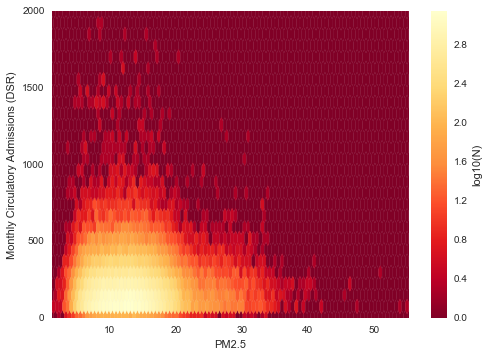

In [61]:
ymin = Circul_AP.DSR.min()
ymax = 2000
xmin = Circul_AP.PM25.min()
xmax = Circul_AP.PM25.max()

plt.hexbin(Circul_AP.PM25, Circul_AP.DSR, bins='log',cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.ylabel('Monthly Circulatory Admissions (DSR)')
plt.xlabel('PM2.5')
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Regression\HES\Circul_AP_monthly_hexbin.jpeg')

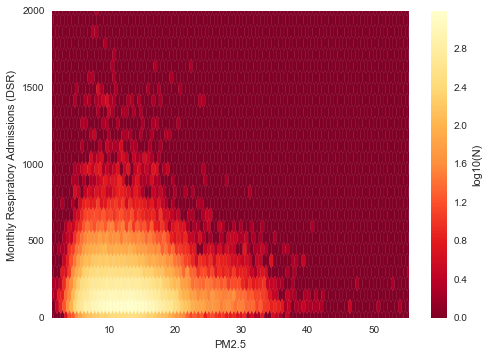

In [62]:
ymin = Respir_AP.DSR.min() 
ymax = 2000
xmin = Respir_AP.PM25.min()
xmax = Respir_AP.PM25.max()

plt.hexbin(Respir_AP.PM25, Respir_AP.DSR, bins='log',cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.ylabel('Monthly Respiratory Admissions (DSR)')
plt.xlabel('PM2.5')
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Regression\HES\Respir_AP_monthly_hexbin.jpeg')

# YEARLY
- complete the analysis again using the yearly data

In [63]:
Circ_Y_2009 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_2009.csv')

In [64]:
Circ_Y_2010 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_2010.csv')

In [65]:
Circ_Y_2011 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_2011.csv')

In [66]:
Circ_Y_2012 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_2012.csv')

In [67]:
Circ_Y_2013 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_2013.csv')

In [68]:
Circulatory_yearly = Circ_Y_2009.append([Circ_Y_2010, Circ_Y_2011, Circ_Y_2012, Circ_Y_2013])

In [69]:
Circulatory_yearly[:10]

,Disease,year,lsoa11,n,DSR,lcl,ucl,score,rank,decile
0,All Circulatory,2009,E01015272,29.0,1379.819824,907.973938,2002.930054,11.430000,22492,7
1,All Circulatory,2009,E01015273,24.0,2712.837646,1679.499756,4116.159180,33.619999,6665,3
2,All Circulatory,2009,E01015274,30.0,2070.800049,1386.778442,2969.841064,20.290001,13991,5
3,All Circulatory,2009,E01015275,37.0,3559.793457,2480.718994,4939.573242,19.780001,14447,5
4,All Circulatory,2009,E01015276,15.0,1460.698853,791.767883,2447.211182,26.400000,10063,4
5,All Circulatory,2009,E01015277,43.0,3493.800781,2469.253418,4780.509277,35.400002,5995,2
6,All Circulatory,2009,E01015279,31.0,3111.310303,2045.067383,4506.430664,45.439999,3096,1
7,All Circulatory,2009,E01015280,19.0,1589.490601,928.755005,2522.017578,43.990002,3420,2
8,All Circulatory,2009,E01015281,17.0,1825.341064,959.422729,3072.159668,59.369999,978,1
9,All Circulatory,2009,E01015282,36.0,4102.072754,2496.800537,6161.738770,71.160004,226,1


In [70]:
Circulatory_yearly.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_all.csv')

In [71]:
Resp_Y_2009 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_2009.csv')

In [72]:
Resp_Y_2010 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_2010.csv')

In [73]:
Resp_Y_2011 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_2011.csv')

In [74]:
Resp_Y_2012 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_2012.csv')

In [75]:
Resp_Y_2013 = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_2013.csv')

In [76]:
Respiratory_yearly = Resp_Y_2009.append([Resp_Y_2010, Resp_Y_2011, Resp_Y_2012, Resp_Y_2013])

In [77]:
Respiratory_yearly[:10]

,Disease,year,lsoa11,n,DSR,lcl,ucl,score,rank,decile
0,All Respiratory,2009,E01015272,12.0,738.839172,367.731018,1312.295532,11.430000,22492,7
1,All Respiratory,2009,E01015273,25.0,1500.134521,896.891479,2314.249512,33.619999,6665,3
2,All Respiratory,2009,E01015274,20.0,1518.648193,919.455261,2356.864258,20.290001,13991,5
3,All Respiratory,2009,E01015275,28.0,2429.869873,1573.156006,3566.883301,19.780001,14447,5
4,All Respiratory,2009,E01015276,32.0,2487.559082,1609.623413,3631.377686,26.400000,10063,4
5,All Respiratory,2009,E01015277,31.0,2871.194824,1869.047119,4182.450195,35.400002,5995,2
6,All Respiratory,2009,E01015279,32.0,2496.507080,1633.889404,3620.368652,45.439999,3096,1
7,All Respiratory,2009,E01015280,37.0,3055.180420,2070.426025,4314.356445,43.990002,3420,2
8,All Respiratory,2009,E01015281,24.0,1794.568115,1129.460938,2697.814941,59.369999,978,1
9,All Respiratory,2009,E01015282,38.0,2713.542236,1748.917114,3942.924805,71.160004,226,1


In [78]:
Respiratory_yearly.to_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_all.csv')

# Reading in Yearly AP

In [79]:
AP_Yearly = pd.read_csv('D:\Annies_Dissertation\Analysis\Regression\Yearly_PM25_LSOA.csv')

In [80]:
AP_Yearly[:10]

,Unnamed: 0,time,LSOA,value,year
0,0,2009-12-31,E01014869,11.056740,2009
1,1,2010-12-31,E01014869,9.198227,2010
2,2,2011-12-31,E01014869,9.872396,2011
3,3,2012-12-31,E01014869,9.418056,2012
4,4,2013-12-31,E01014869,9.172091,2013
5,5,2014-12-31,E01014869,9.128167,2014
6,6,2009-12-31,E01014890,10.958618,2009
7,7,2010-12-31,E01014890,8.324327,2010
8,8,2011-12-31,E01014890,10.465442,2011
9,9,2012-12-31,E01014890,8.765922,2012


In [81]:
AP_Yearly = AP_Yearly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [82]:
AP_Yearly = AP_Yearly[['time', 'lsoa11', 'PM25', 'year']].dropna()

In [83]:
Circul_AP_Y = pd.merge(Circulatory_yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

In [84]:
Circul_AP_Y[:10]

,Disease,year,lsoa11,n,DSR,lcl,ucl,score,rank,decile,time,PM25
0,All Circulatory,2009,E01015272,29.0,1379.819824,907.973938,2002.930054,11.430000,22492,7,2009-12-31,15.233035
1,All Circulatory,2009,E01015273,24.0,2712.837646,1679.499756,4116.159180,33.619999,6665,3,2009-12-31,15.614657
2,All Circulatory,2009,E01015274,30.0,2070.800049,1386.778442,2969.841064,20.290001,13991,5,2009-12-31,15.820494
3,All Circulatory,2009,E01015275,37.0,3559.793457,2480.718994,4939.573242,19.780001,14447,5,2009-12-31,15.245512
4,All Circulatory,2009,E01015276,15.0,1460.698853,791.767883,2447.211182,26.400000,10063,4,2009-12-31,15.811707
5,All Circulatory,2009,E01015277,43.0,3493.800781,2469.253418,4780.509277,35.400002,5995,2,2009-12-31,15.684235
6,All Circulatory,2009,E01015279,31.0,3111.310303,2045.067383,4506.430664,45.439999,3096,1,2009-12-31,15.220558
7,All Circulatory,2009,E01015280,19.0,1589.490601,928.755005,2522.017578,43.990002,3420,2,2009-12-31,15.233035
8,All Circulatory,2009,E01015281,17.0,1825.341064,959.422729,3072.159668,59.369999,978,1,2009-12-31,15.220558
9,All Circulatory,2009,E01015282,36.0,4102.072754,2496.800537,6161.738770,71.160004,226,1,2009-12-31,15.220558


In [86]:
Respir_AP_Y = pd.merge(Respiratory_yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

In [88]:
Circul_AP_Y.corr()

,year,n,DSR,lcl,ucl,score,rank,decile,PM25
year,1.000000,-0.020153,-0.079992,-0.063118,-0.083546,0.000092,-0.000108,-0.000113,-0.119996
n,-0.020153,1.000000,0.509573,0.715092,0.244166,-0.074654,0.062805,0.063177,0.098710
DSR,-0.079992,0.509573,1.000000,0.901874,0.906932,0.240652,-0.240456,-0.239051,0.067817
lcl,-0.063118,0.715092,0.901874,1.000000,0.640985,0.190892,-0.197784,-0.196440,0.092763
ucl,-0.083546,0.244166,0.906932,0.640985,1.000000,0.240201,-0.233863,-0.232526,0.032775
score,0.000092,-0.074654,0.240652,0.190892,0.240201,1.000000,-0.949592,-0.943582,0.135810
rank,-0.000108,0.062805,-0.240456,-0.197784,-0.233863,-0.949592,1.000000,0.994074,-0.143463
decile,-0.000113,0.063177,-0.239051,-0.196440,-0.232526,-0.943582,0.994074,1.000000,-0.141190
PM25,-0.119996,0.098710,0.067817,0.092763,0.032775,0.135810,-0.143463,-0.141190,1.000000


In [89]:
Respir_AP_Y.corr()

,year,n,DSR,lcl,ucl,score,rank,decile,PM25
year,1.000000e+00,0.049227,-0.020017,0.000026,-0.036452,-3.498390e-18,1.899945e-18,2.498210e-18,-0.119950
n,4.922729e-02,1.000000,0.740169,0.846557,0.563105,4.172663e-01,-4.020796e-01,-3.962107e-01,0.049955
DSR,-2.001679e-02,0.740169,1.000000,0.929011,0.950700,5.164075e-01,-4.862013e-01,-4.820421e-01,0.030126
lcl,2.618797e-05,0.846557,0.929011,1.000000,0.769785,5.230788e-01,-4.955470e-01,-4.913294e-01,0.039115
ucl,-3.645178e-02,0.563105,0.950700,0.769785,1.000000,4.548459e-01,-4.251889e-01,-4.217082e-01,0.017033
score,-3.498390e-18,0.417266,0.516407,0.523079,0.454846,1.000000e+00,-9.495980e-01,-9.435878e-01,0.135738
rank,1.899945e-18,-0.402080,-0.486201,-0.495547,-0.425189,-9.495980e-01,1.000000e+00,9.940747e-01,-0.143375
decile,2.498210e-18,-0.396211,-0.482042,-0.491329,-0.421708,-9.435878e-01,9.940747e-01,1.000000e+00,-0.141098
PM25,-1.199503e-01,0.049955,0.030126,0.039115,0.017033,1.357382e-01,-1.433750e-01,-1.410981e-01,1.000000


# Yearly Regression

In [90]:
model =ols("DSR ~ score", data=Circul_AP_Y)
Circulatory_results = model.fit()
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     505.7
Date:                Sat, 17 Sep 2016   Prob (F-statistic):          9.65e-109
Time:                        18:17:33   Log-Likelihood:                -65382.
No. Observations:                8229   AIC:                         1.308e+05
Df Residuals:                    8227   BIC:                         1.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1608.1301     12.572    127.910      0.000      1583.485  1632.775
score         13.9617      0.621     22.489      0.000        12.745    15.179
==============================================================================
Omnibus:                     3105.347   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29205.646
Skew:                           1.542   Prob(JB):                         0.00
Kurtosis:                      11.699   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model =ols("DSR ~ score", data=Respir_AP_Y)
Respiratory_results = model.fit()
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2992.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:17:34   Log-Likelihood:                -65141.
No. Observations:                8230   AIC:                         1.303e+05
Df Residuals:                    8228   BIC:                         1.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1023.8268     12.198     83.934      0.000       999.916  1047.738
score         32.9464      0.602     54.701      0.000        31.766    34.127
==============================================================================
Omnibus:                     3419.198   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30731.777
Skew:                           1.752   Prob(JB):                         0.00
Kurtosis:                      11.794   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model =ols("DSR ~ PM25", data=Circul_AP_Y)
Circulatory_results = model.fit()
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     38.01
Date:                Sat, 17 Sep 2016   Prob (F-statistic):           7.36e-10
Time:                        18:17:34   Log-Likelihood:                -65609.
No. Observations:                8229   AIC:                         1.312e+05
Df Residuals:                    8227   BIC:                         1.312e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1520.1321     51.582     29.470      0.000      1419.018  1621.246
PM25          24.1548      3.918      6.165      0.000        16.475    31.835
==============================================================================
Omnibus:                     2985.597   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23152.263
Skew:                           1.531   Prob(JB):                         0.00
Kurtosis:                      10.625   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model =ols("DSR ~ PM25", data=Respir_AP_Y)
Respiratory_results = model.fit()
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.474
Date:                Sat, 17 Sep 2016   Prob (F-statistic):            0.00627
Time:                        18:17:35   Log-Likelihood:                -66414.
No. Observations:                8230   AIC:                         1.328e+05
Df Residuals:                    8228   BIC:                         1.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1404.5868     56.828     24.716      0.000      1293.189  1515.985
PM25          11.8004      4.316      2.734      0.006         3.339    20.262
==============================================================================
Omnibus:                     3378.942   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21426.877
Skew:                           1.851   Prob(JB):                         0.00
Kurtosis:                       9.984   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model =ols("DSR ~ PM25 + score", data=Circul_AP_Y)
Circulatory_results = model.fit()
Circulatory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sat, 17 Sep 2016   Prob (F-statistic):          1.12e-109
Time:                        18:17:35   Log-Likelihood:                -65377.
No. Observations:                8229   AIC:                         1.308e+05
Df Residuals:                    8226   BIC:                         1.308e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1446.7497     50.264     28.783      0.000      1348.220  1545.279
PM25          12.7490      3.845      3.316      0.001         5.212    20.286
score         13.6796      0.626     21.844      0.000        12.452    14.907
==============================================================================
Omnibus:                     3114.687   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29594.391
Skew:                           1.544   Prob(JB):                         0.00
Kurtosis:                      11.762   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model =ols("DSR ~ PM25 + score", data=Respir_AP_Y)
Respiratory_results = model.fit()
Respiratory_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DSR   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:17:36   Log-Likelihood:                -65132.
No. Observations:                8230   AIC:                         1.303e+05
Df Residuals:                    8227   BIC:                         1.303e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1225.7317     48.745     25.146      0.000      1130.180  1321.284
PM25         -15.9504      3.729     -4.278      0.000       -23.259    -8.641
score         33.2990      0.607     54.832      0.000        32.109    34.489
==============================================================================
Omnibus:                     3377.003   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29830.995
Skew:                           1.731   Prob(JB):                         0.00
Kurtosis:                      11.660   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

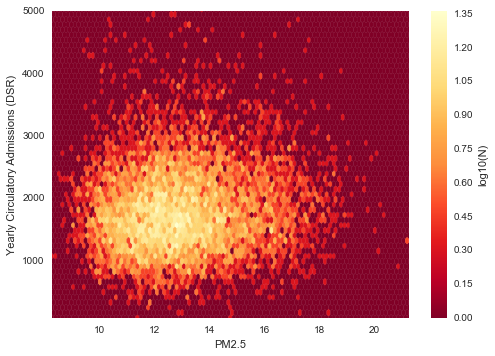

In [98]:
ymin = Circul_AP_Y.DSR.min()
ymax = 5000
xmin = Circul_AP_Y.PM25.min()
xmax = Circul_AP_Y.PM25.max()

plt.hexbin(Circul_AP_Y.PM25, Circul_AP_Y.DSR, bins='log',cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.ylabel('Yearly Circulatory Admissions (DSR)')
plt.xlabel('PM2.5')
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Regression\HES\Circul_AP_yearly_hexbin.jpeg')

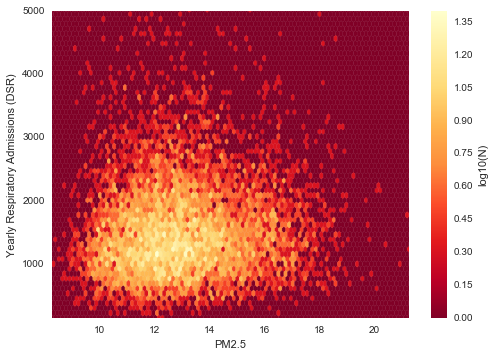

In [99]:
ymin = Respir_AP_Y.DSR.min() 
ymax = 5000
xmin = Respir_AP_Y.PM25.min()
xmax = Respir_AP_Y.PM25.max()

plt.hexbin(Respir_AP_Y.PM25, Respir_AP_Y.DSR, bins='log',cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.ylabel('Yearly Respiratory Admissions (DSR)')
plt.xlabel('PM2.5')
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Regression\HES\Respir_AP_yearly_hexbin.jpeg')